In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy import read, UTCDateTime as UTC
from obspy.signal import filter

import helpers

In [2]:
files = [
    '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.297'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.297'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.297'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.297'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.297'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.297'
        ]

streams = [obspy.read(f) for f in files]

In [3]:
streams[0]

3 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-24T00:00:03.839000Z - 2019-10-24T05:32:30.997000Z | 1000.0 Hz, 19947159 samples
7F.B00.01.GDH | 2019-10-24T05:32:27.998000Z - 2019-10-24T23:31:18.997000Z | 1000.0 Hz, 64731000 samples
7F.B00.01.GDH | 2019-10-24T23:31:16.998000Z - 2019-10-25T00:00:02.558000Z | 1000.0 Hz, 1725561 samples

In [4]:
stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-24T00:00:03.839000Z - 2019-10-25T00:00:02.558000Z | 1000.0 Hz, 86398720 samples
7F.B00.02.GDH | 2019-10-24T00:00:03.112000Z - 2019-10-25T00:00:03.351000Z | 1000.0 Hz, 86400240 samples
7F.B00.03.GDH | 2019-10-24T00:00:02.243000Z - 2019-10-25T00:00:03.322000Z | 1000.0 Hz, 86401080 samples
7F.B00.04.GDH | 2019-10-24T00:00:02.738000Z - 2019-10-25T00:00:02.076000Z | 1000.0 Hz, 86399339 samples
7F.B00.05.GDH | 2019-10-24T00:00:00.343000Z - 2019-10-25T00:00:01.903000Z | 1000.0 Hz, 86401561 samples
7F.B00.06.GDH | 2019-10-24T00:00:01.353000Z - 2019-10-25T00:00:02.106000Z | 1000.0 Hz, 86400754 samples

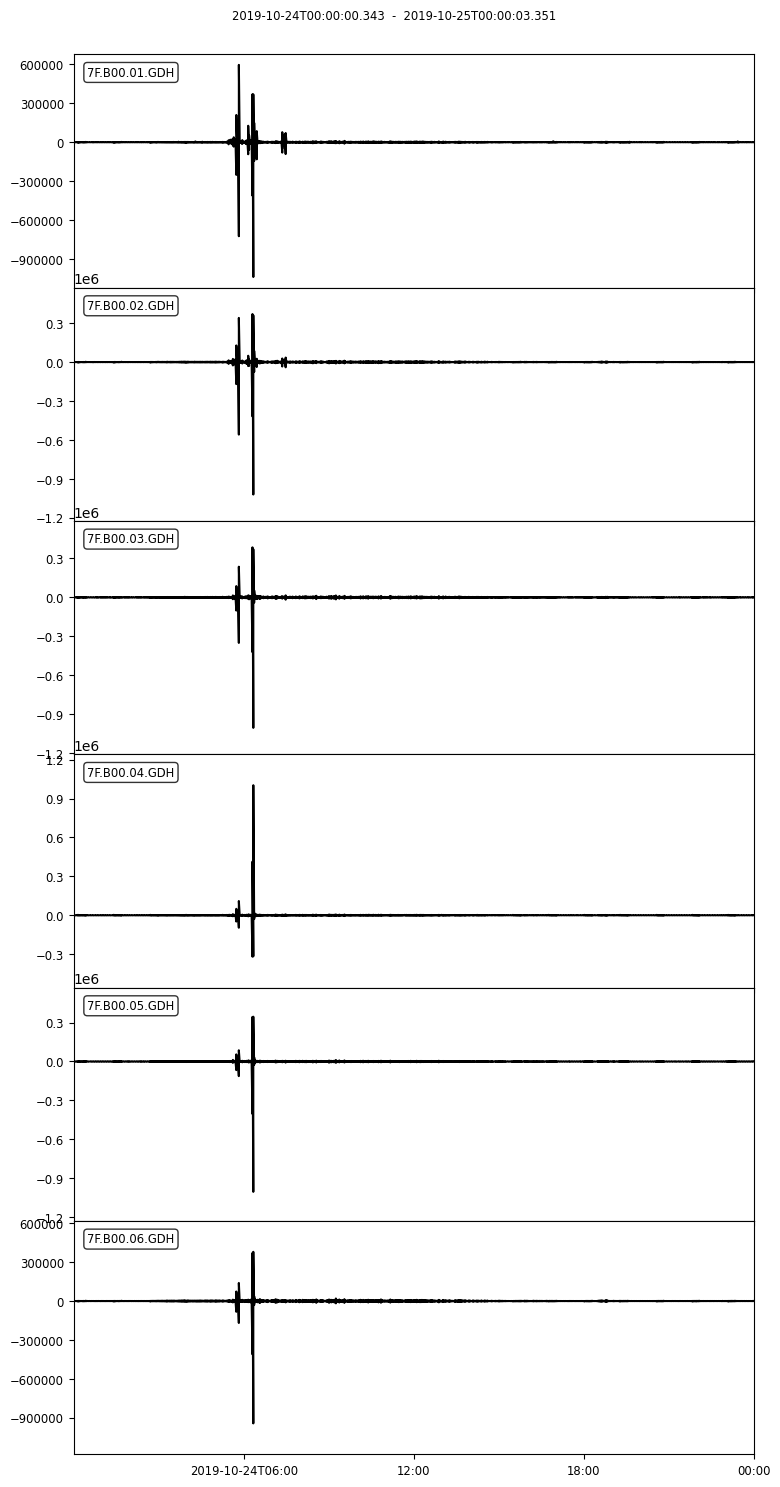

In [5]:
x = stream.plot()

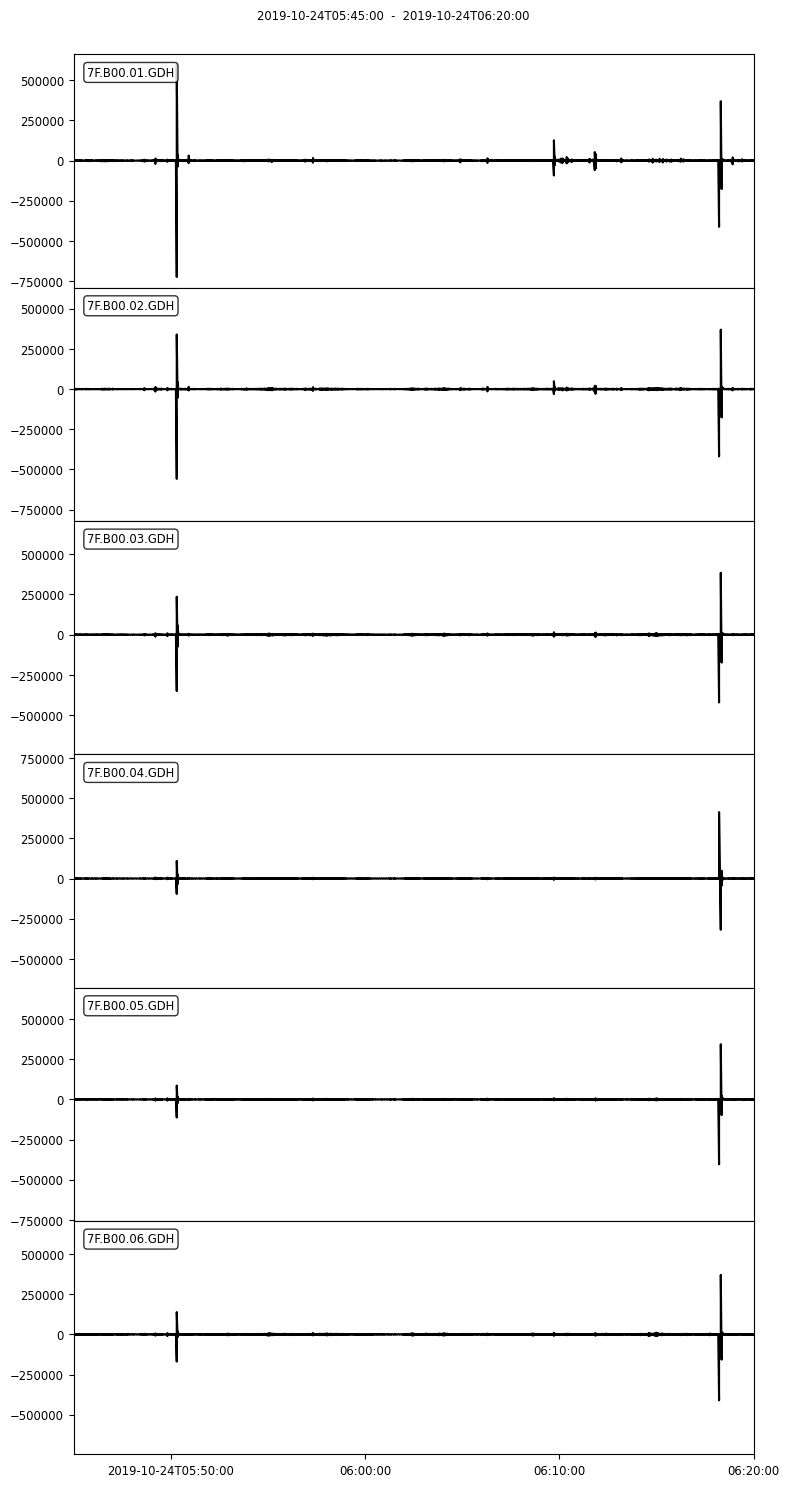

In [6]:
x = stream.plot(starttime=UTC('2019-10-24T05:45:00.0'), endtime=UTC('2019-10-24T06:20:00.0'))

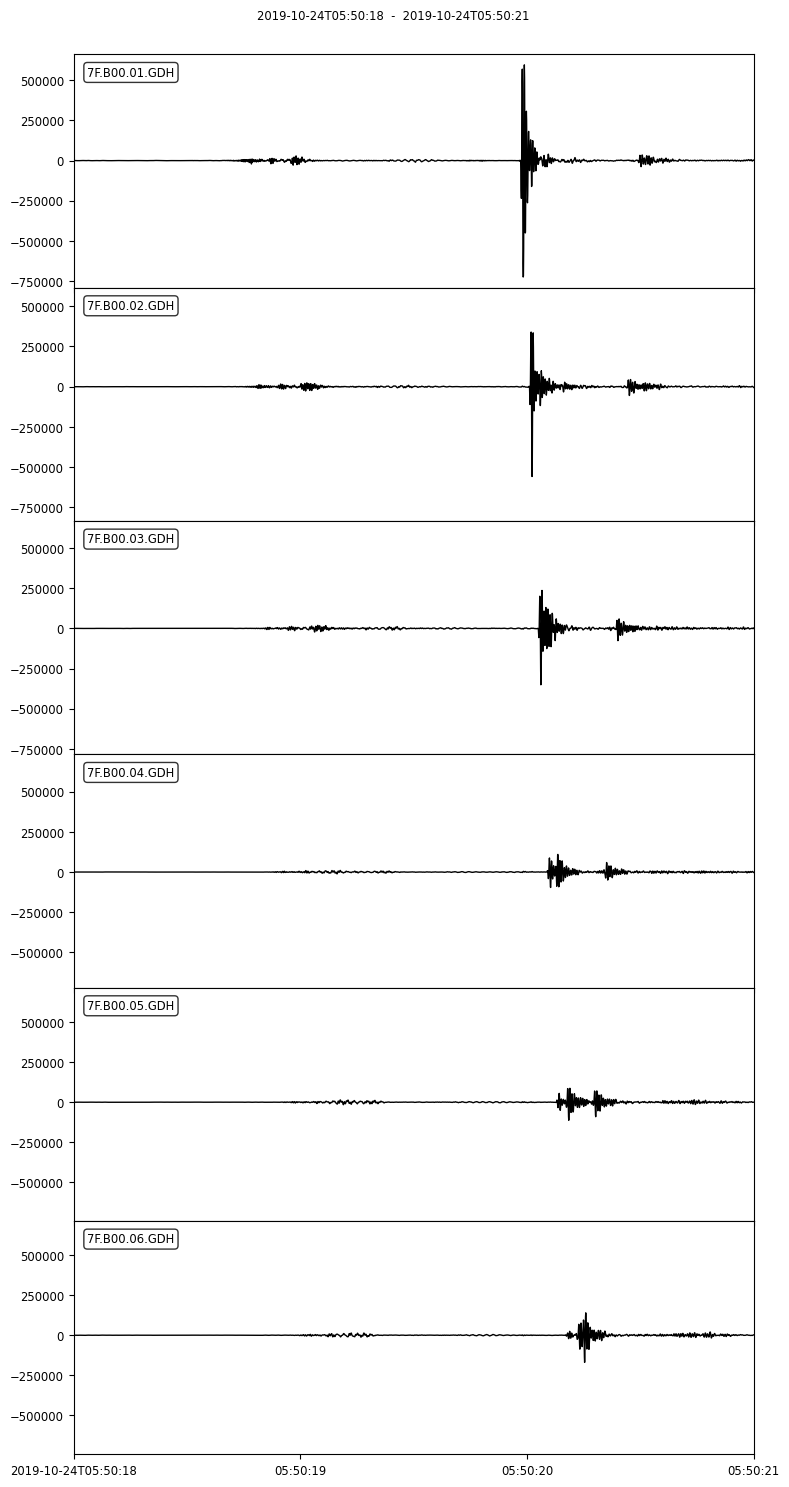

In [7]:
x = stream.plot(starttime=UTC('2019-10-24T05:50:18.0'), endtime=UTC('2019-10-24T05:50:21.0'))

/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


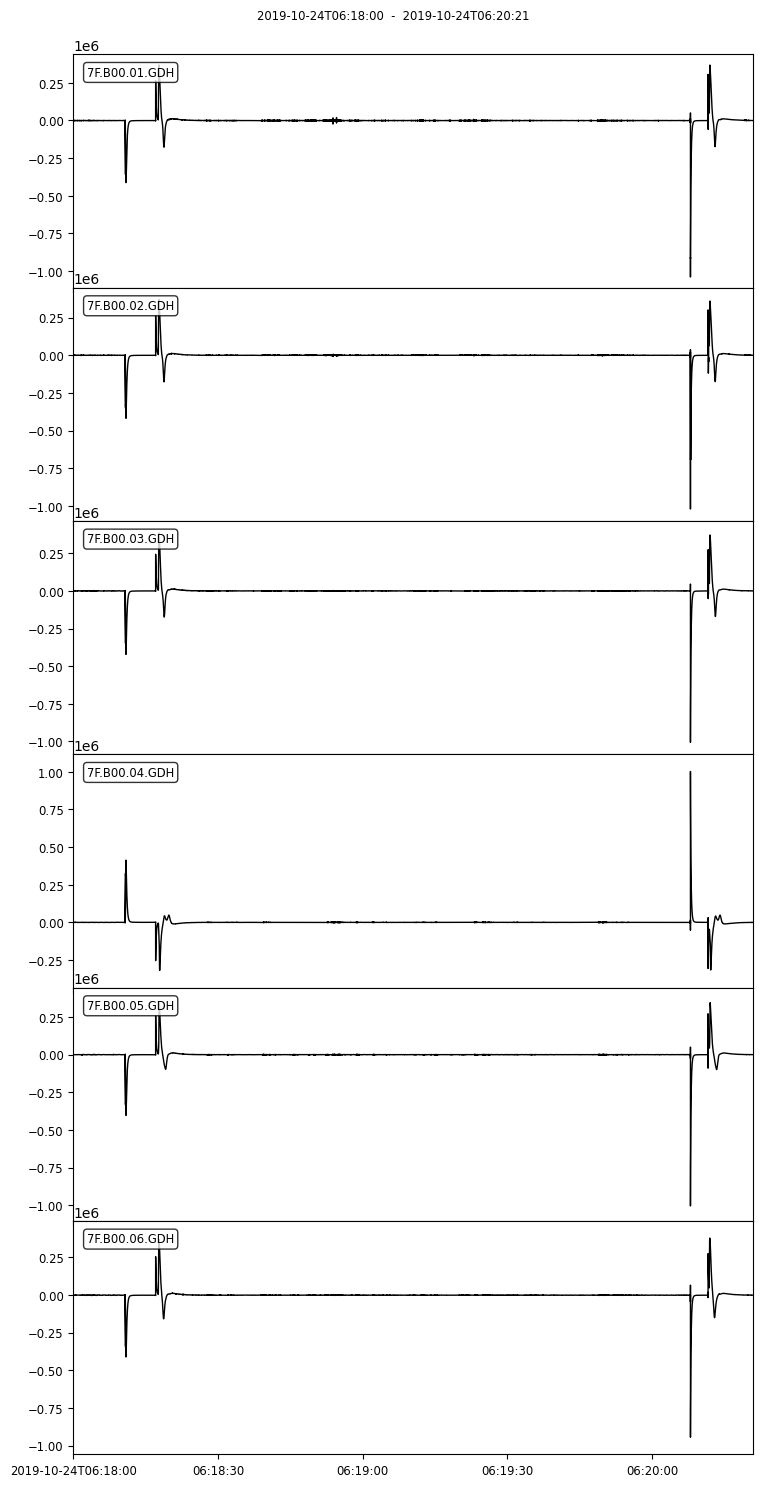

In [8]:
x = stream.plot(starttime=UTC('2019-10-24T06:18:00.0'), endtime=UTC('2019-10-24T06:20:21.0'))

In [9]:
def digest_data(filedir):
    stream = obspy.read(filedir)
    stream.detrend('demean')
    stream.normalize()
    stream[0].data = filter.highpass(stream[0].data, freq=40, df=1000)
    stream[0].data = filter.lowpass(stream[0].data, freq=5, df=1000)
    return stream

streams = [digest_data(f) for f in files]
stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-24T00:00:03.839000Z - 2019-10-25T00:00:02.558000Z | 1000.0 Hz, 86398720 samples (masked)
7F.B00.02.GDH | 2019-10-24T00:00:03.112000Z - 2019-10-25T00:00:03.351000Z | 1000.0 Hz, 86400240 samples (masked)
7F.B00.03.GDH | 2019-10-24T00:00:02.243000Z - 2019-10-25T00:00:03.322000Z | 1000.0 Hz, 86401080 samples (masked)
7F.B00.04.GDH | 2019-10-24T00:00:02.738000Z - 2019-10-25T00:00:02.076000Z | 1000.0 Hz, 86399339 samples (masked)
7F.B00.05.GDH | 2019-10-24T00:00:00.343000Z - 2019-10-25T00:00:01.903000Z | 1000.0 Hz, 86401561 samples (masked)
7F.B00.06.GDH | 2019-10-24T00:00:01.353000Z - 2019-10-25T00:00:02.106000Z | 1000.0 Hz, 86400754 samples (masked)

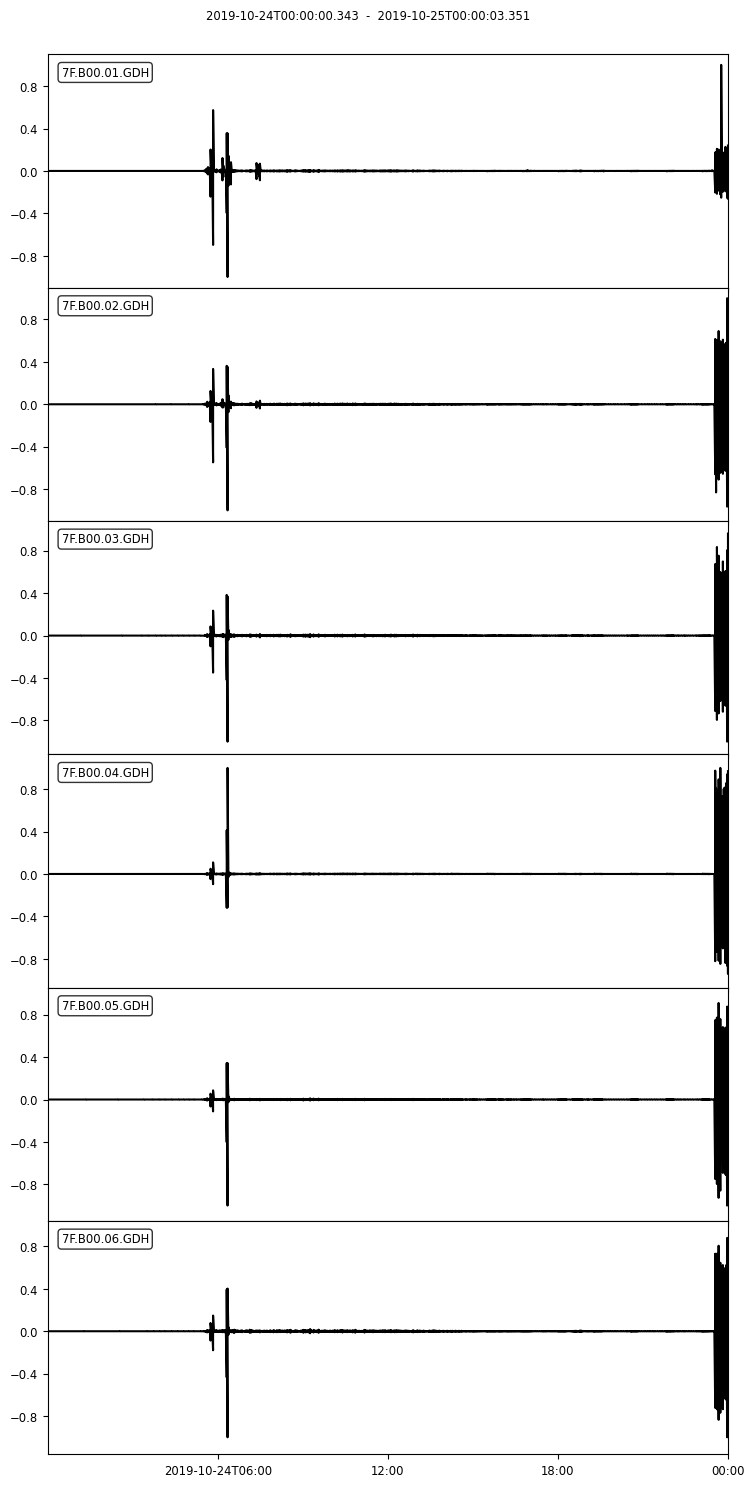

In [10]:
x = stream.plot()

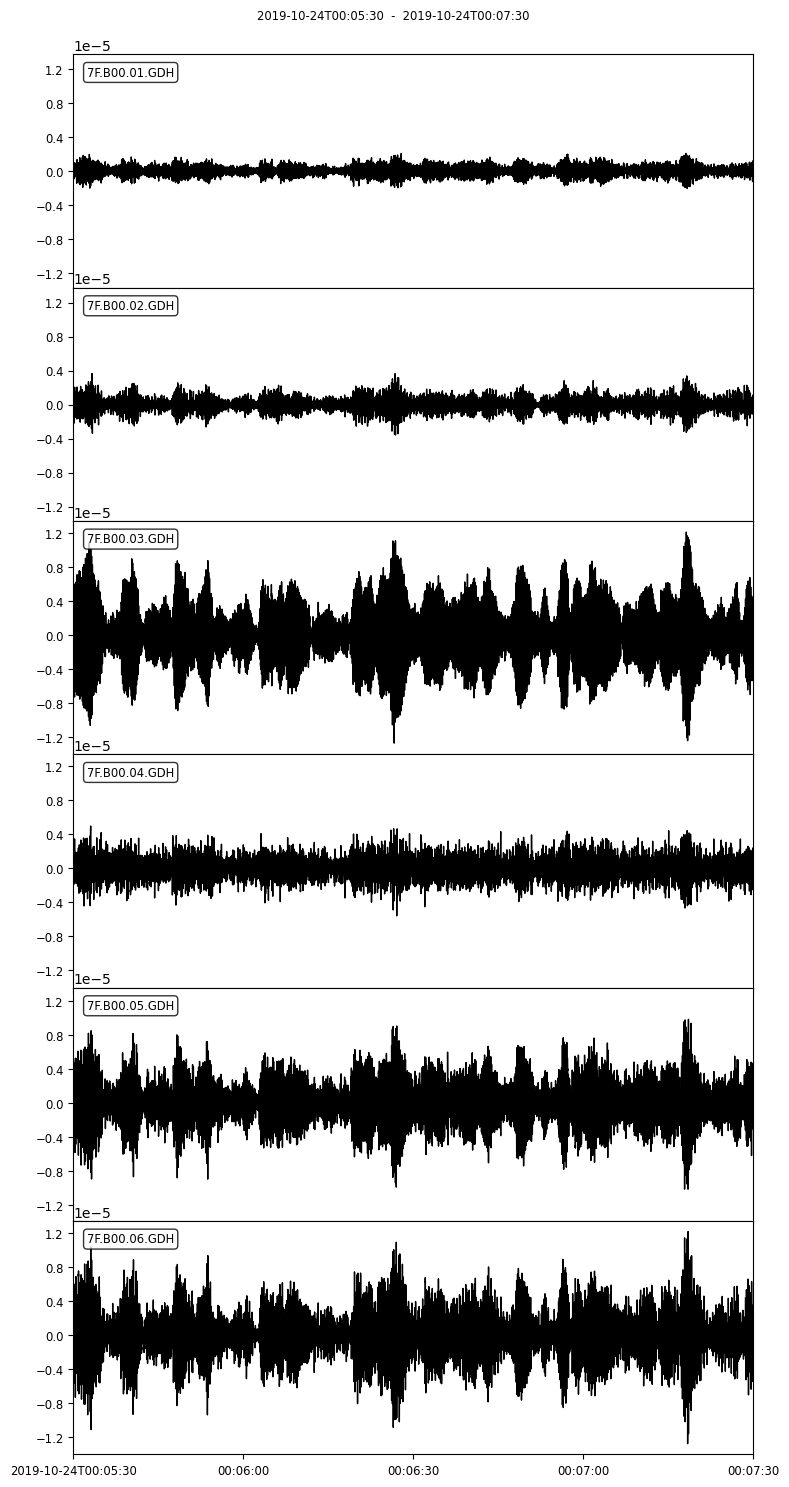

In [11]:
x = stream.plot(starttime=UTC('2019-10-24T00:05:30.0'), endtime=UTC('2019-10-24T00:07:30.0'))

In [12]:
files = [
    '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.298'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.298'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.298'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.298'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.298'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.298'
        ]

streams = [obspy.read(f) for f in files]

stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-25T00:00:02.559000Z - 2019-10-26T00:00:03.479000Z | 1000.0 Hz, 86400921 samples
7F.B00.02.GDH | 2019-10-25T00:00:03.352001Z - 2019-10-26T00:00:02.459001Z | 1000.0 Hz, 86399108 samples
7F.B00.03.GDH | 2019-10-25T00:00:03.323001Z - 2019-10-26T00:00:01.192001Z | 1000.0 Hz, 86397870 samples
7F.B00.04.GDH | 2019-10-25T00:00:02.077000Z - 2019-10-26T00:00:02.864000Z | 1000.0 Hz, 86400788 samples
7F.B00.05.GDH | 2019-10-25T00:00:01.904000Z - 2019-10-26T00:00:01.474000Z | 1000.0 Hz, 86399571 samples
7F.B00.06.GDH | 2019-10-25T00:00:02.107000Z - 2019-10-26T00:00:03.351000Z | 1000.0 Hz, 86401245 samples

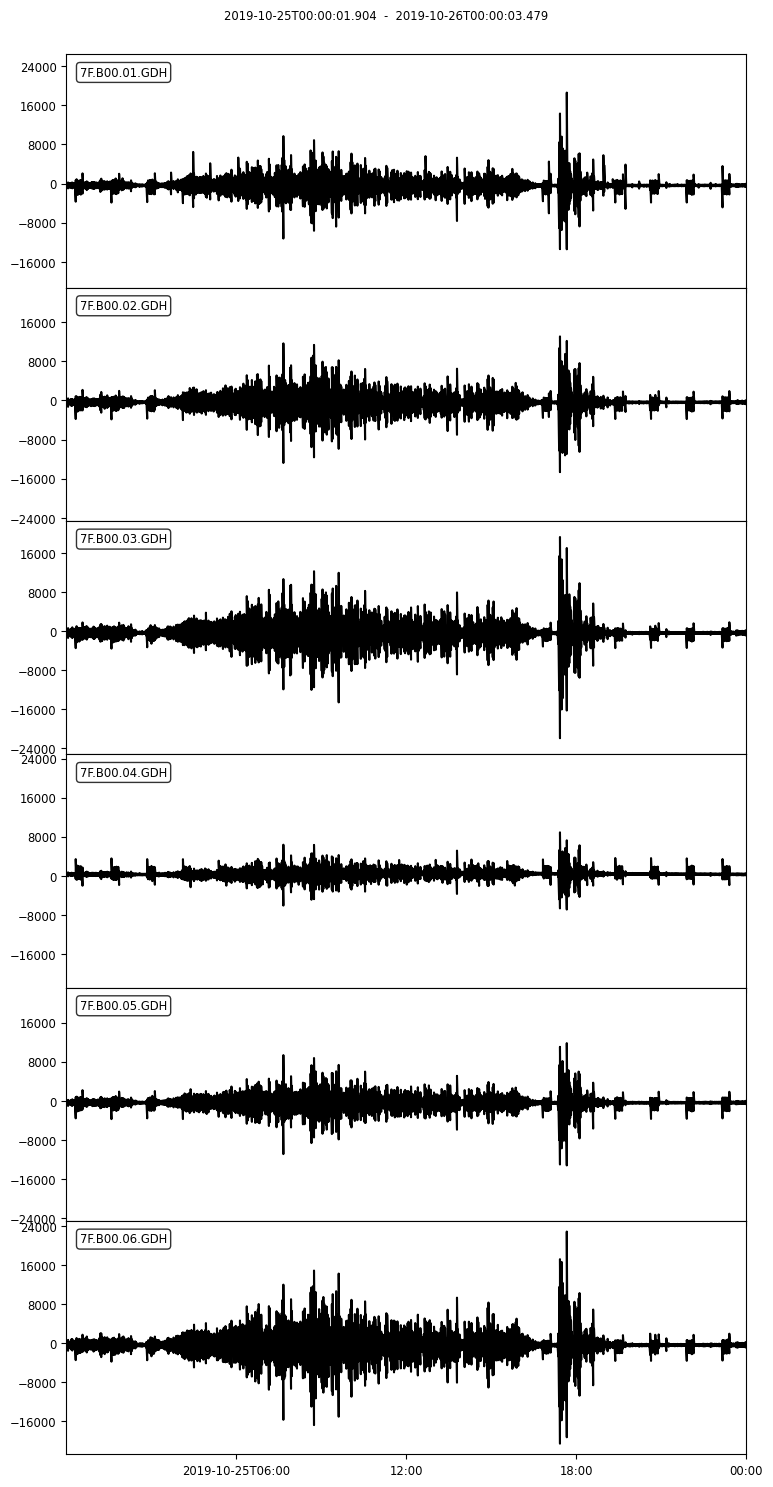

In [13]:
x = stream.plot()

In [14]:
streams = [digest_data(f) for f in files]
stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-25T00:00:02.559000Z - 2019-10-26T00:00:03.479000Z | 1000.0 Hz, 86400921 samples
7F.B00.02.GDH | 2019-10-25T00:00:03.352001Z - 2019-10-26T00:00:02.459001Z | 1000.0 Hz, 86399108 samples
7F.B00.03.GDH | 2019-10-25T00:00:03.323001Z - 2019-10-26T00:00:01.192001Z | 1000.0 Hz, 86397870 samples
7F.B00.04.GDH | 2019-10-25T00:00:02.077000Z - 2019-10-26T00:00:02.864000Z | 1000.0 Hz, 86400788 samples
7F.B00.05.GDH | 2019-10-25T00:00:01.904000Z - 2019-10-26T00:00:01.474000Z | 1000.0 Hz, 86399571 samples
7F.B00.06.GDH | 2019-10-25T00:00:02.107000Z - 2019-10-26T00:00:03.351000Z | 1000.0 Hz, 86401245 samples

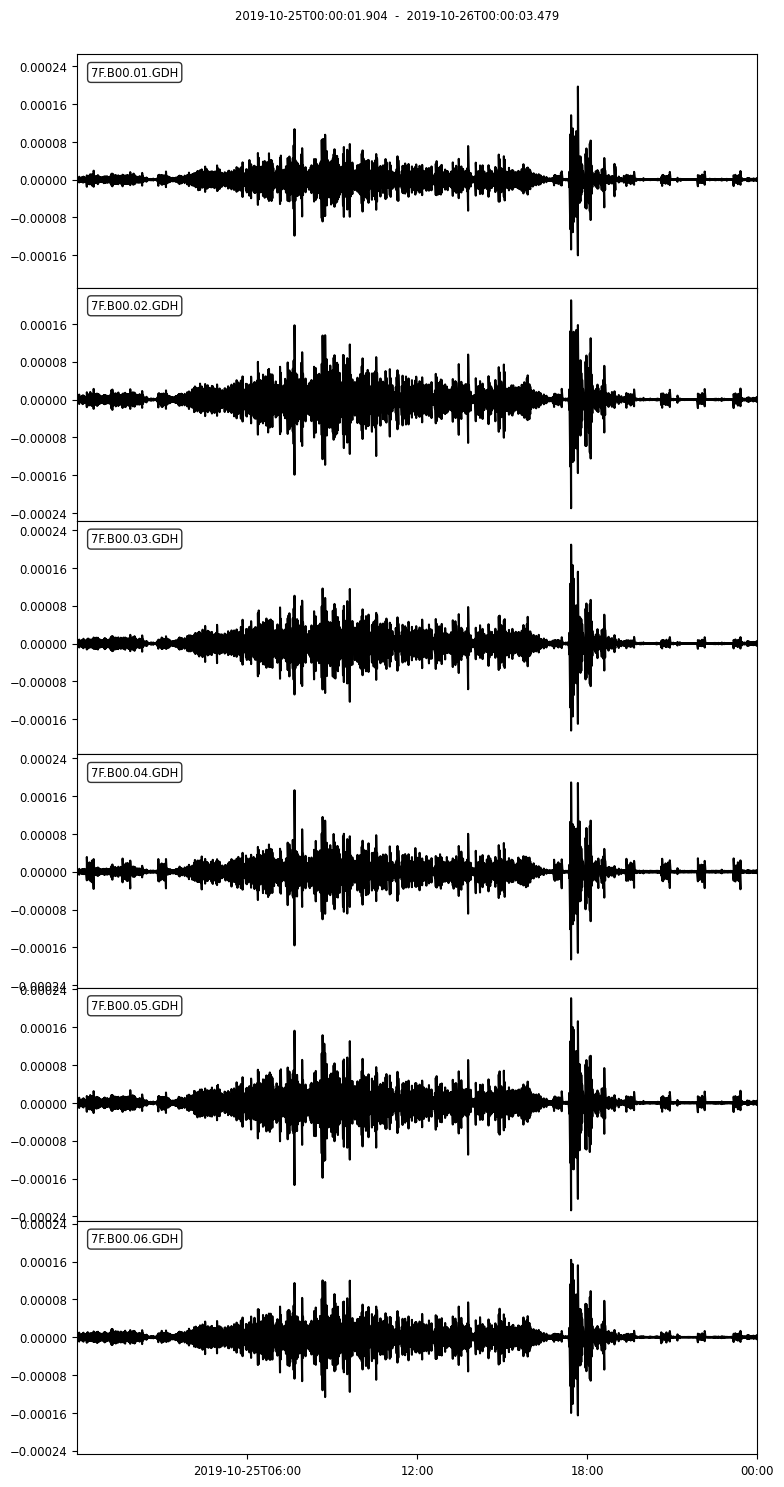

In [15]:
x = stream.plot()

In [16]:
files = [
    '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.299'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.299'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.299'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.299'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.299'
    ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.299'
        ]

streams = [obspy.read(f) for f in files]

stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-26T00:00:03.480000Z - 2019-10-27T00:00:02.803000Z | 1000.0 Hz, 86399324 samples
7F.B00.02.GDH | 2019-10-26T00:00:02.460000Z - 2019-10-27T00:00:00.272000Z | 1000.0 Hz, 86397813 samples
7F.B00.03.GDH | 2019-10-26T00:00:01.193000Z - 2019-10-27T00:00:01.682000Z | 1000.0 Hz, 86400490 samples
7F.B00.04.GDH | 2019-10-26T00:00:02.865000Z - 2019-10-27T00:00:03.542000Z | 1000.0 Hz, 86400678 samples
7F.B00.05.GDH | 2019-10-26T00:00:01.475000Z - 2019-10-27T00:00:03.431000Z | 1000.0 Hz, 86401957 samples
7F.B00.06.GDH | 2019-10-26T00:00:03.352000Z - 2019-10-27T00:00:02.520000Z | 1000.0 Hz, 86399169 samples

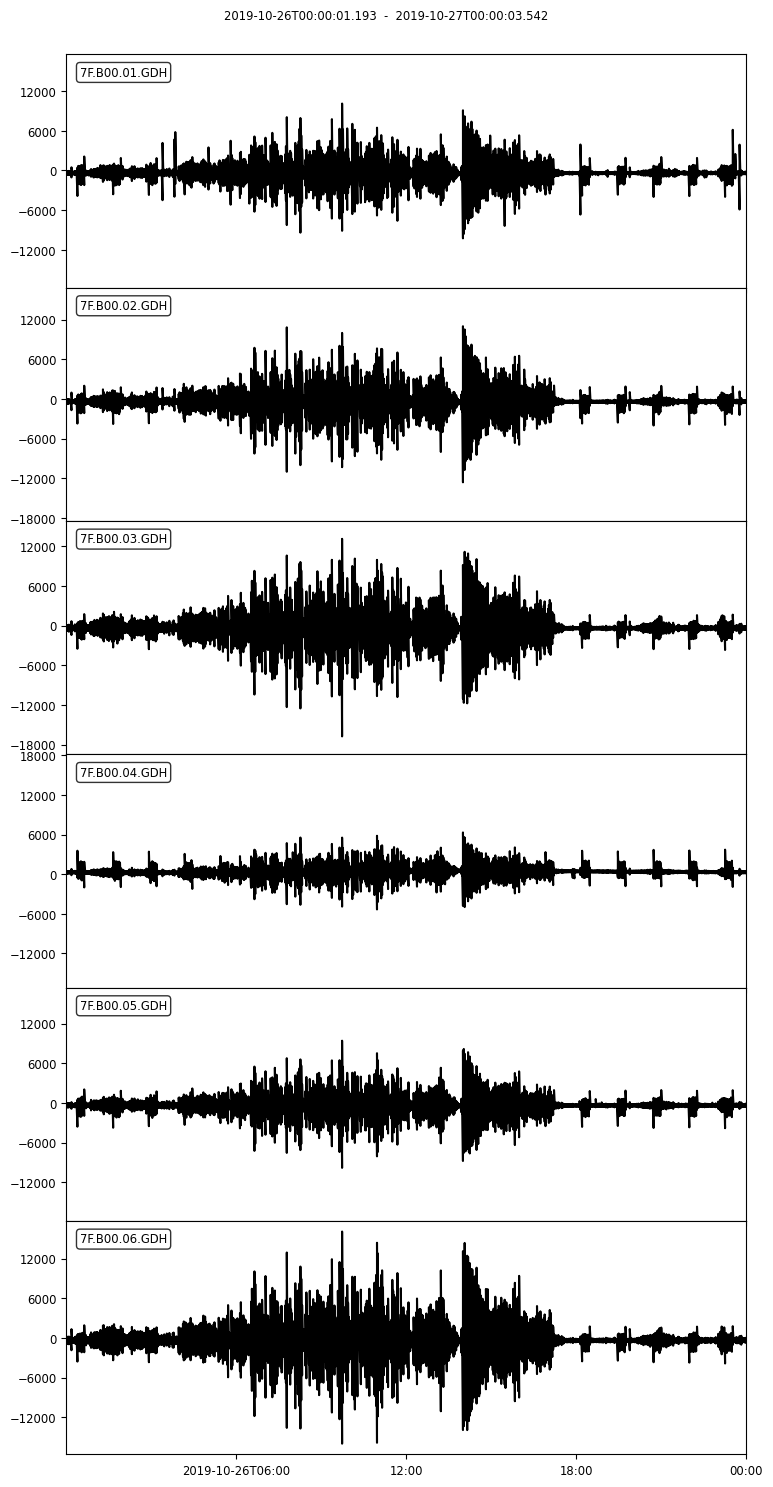

In [17]:
x = stream.plot()

In [18]:
streams = [digest_data(f) for f in files]
stream = streams[0].merge()
for s in streams[1:]:
    stream = stream + s.merge()
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-26T00:00:03.480000Z - 2019-10-27T00:00:02.803000Z | 1000.0 Hz, 86399324 samples
7F.B00.02.GDH | 2019-10-26T00:00:02.460000Z - 2019-10-27T00:00:00.272000Z | 1000.0 Hz, 86397813 samples
7F.B00.03.GDH | 2019-10-26T00:00:01.193000Z - 2019-10-27T00:00:01.682000Z | 1000.0 Hz, 86400490 samples
7F.B00.04.GDH | 2019-10-26T00:00:02.865000Z - 2019-10-27T00:00:03.542000Z | 1000.0 Hz, 86400678 samples
7F.B00.05.GDH | 2019-10-26T00:00:01.475000Z - 2019-10-27T00:00:03.431000Z | 1000.0 Hz, 86401957 samples
7F.B00.06.GDH | 2019-10-26T00:00:03.352000Z - 2019-10-27T00:00:02.520000Z | 1000.0 Hz, 86399169 samples

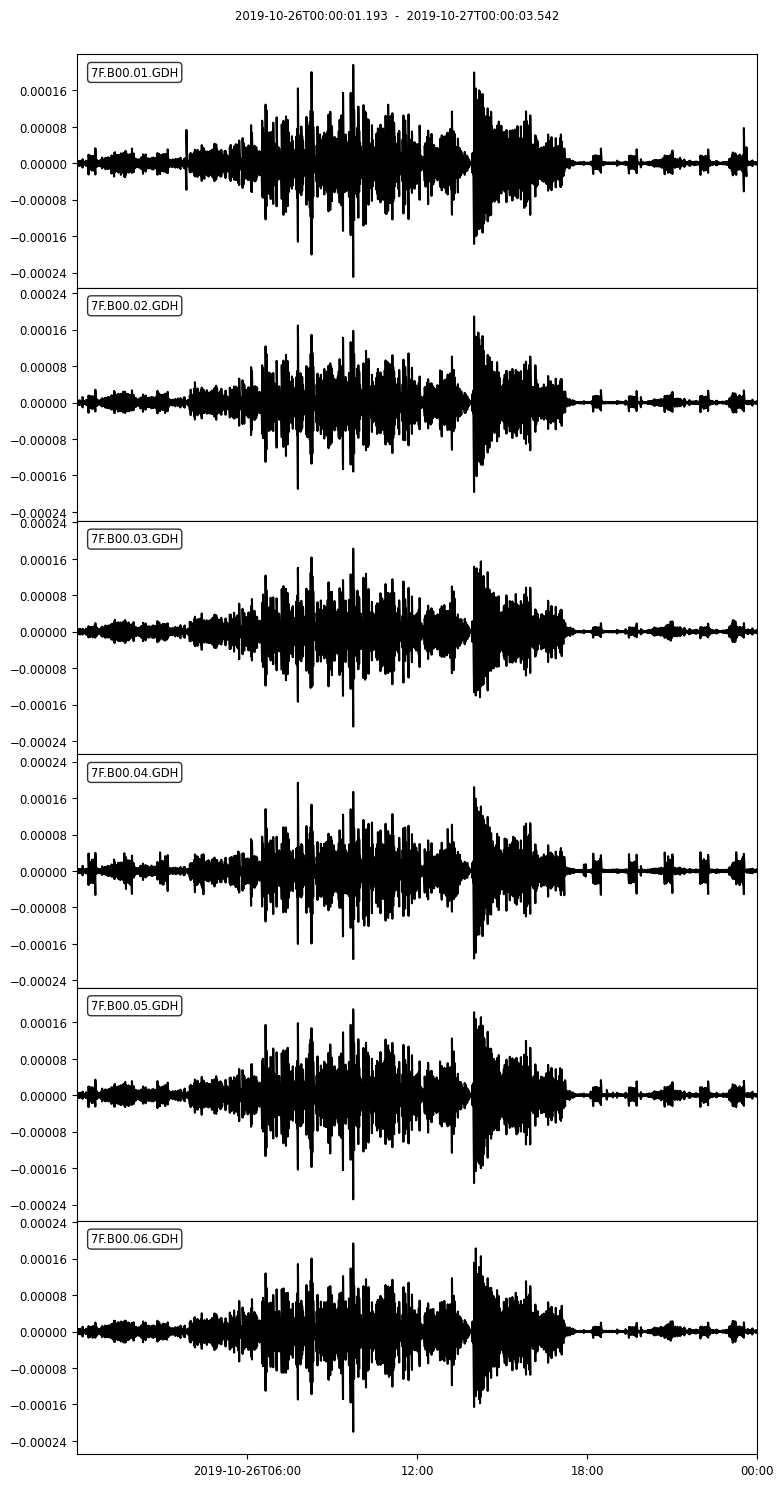

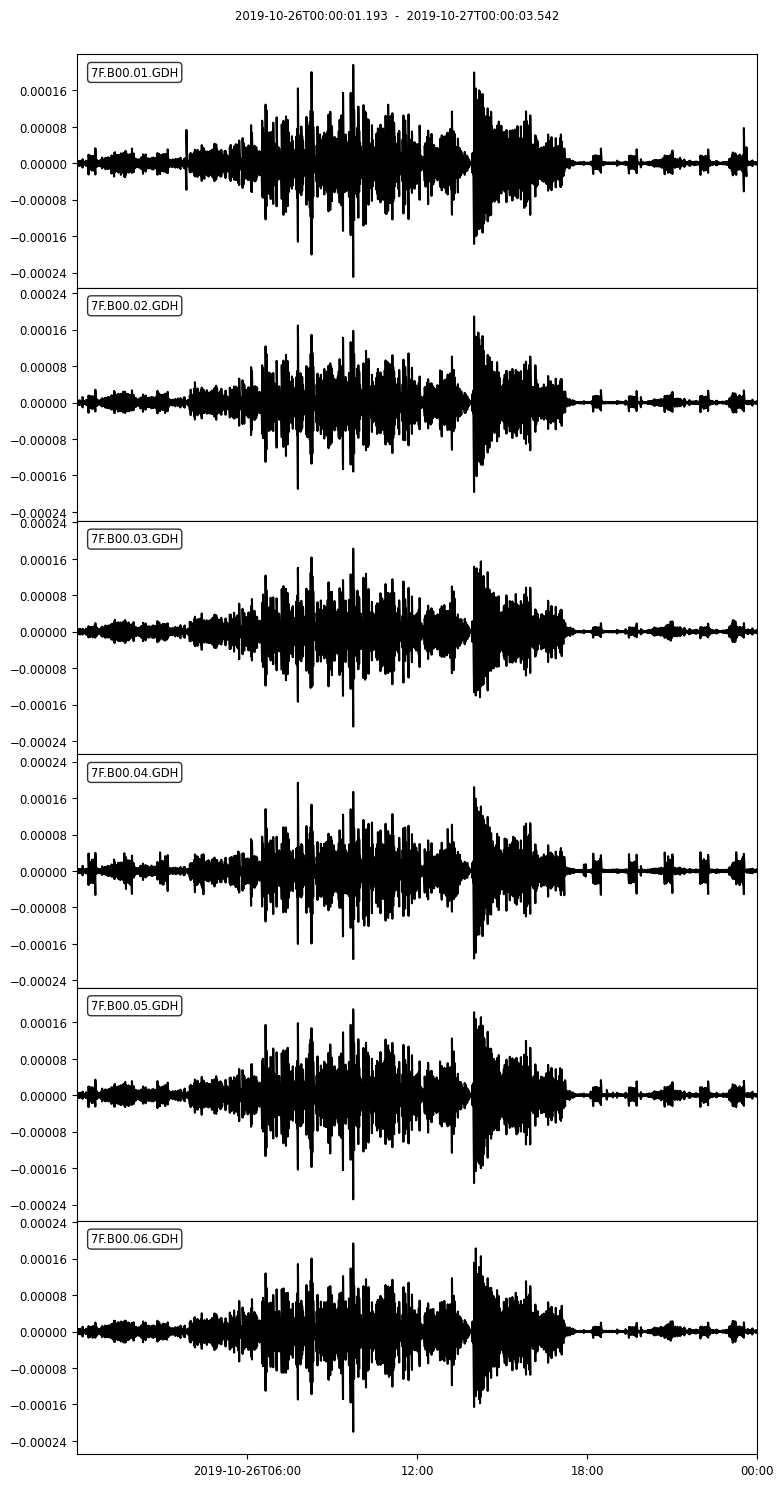

In [19]:
stream.plot()